<a href="https://colab.research.google.com/github/Josephmdlv/Final-work/blob/main/DID_unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install linearmodels
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import os
from google.colab import files
import requests

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
from google.colab import files
uploaded = files.upload ()

Saving MENA_Unemployment_Rates_did.csv to MENA_Unemployment_Rates_did.csv


In [ ]:
df_s = pd.read_csv('MENA_Unemployment_Rates_did.csv')
df_s

,date_year,unemployement_rate,Country_name
0,2000,11.699,"Iran, Islamic Rep."
1,2001,12.356,"Iran, Islamic Rep."
2,2002,12.800,"Iran, Islamic Rep."
3,2003,11.528,"Iran, Islamic Rep."
4,2004,10.300,"Iran, Islamic Rep."
5,2005,11.813,"Iran, Islamic Rep."
6,2006,11.519,"Iran, Islamic Rep."
7,2007,10.772,"Iran, Islamic Rep."
8,2008,10.630,"Iran, Islamic Rep."
9,2009,12.113,"Iran, Islamic Rep."


In [ ]:
df_s['date_year'] = pd.to_datetime(df_s['date_year'], format='%Y')
df_s = df_s.drop([0, 1, 2, 3, 4, 21, 22, 23, 24, 25]) # provide index of the rows you want to remove.
df_s

,date_year,unemployement_rate,Country_name
5,2005-01-01,11.813,"Iran, Islamic Rep."
6,2006-01-01,11.519,"Iran, Islamic Rep."
7,2007-01-01,10.772,"Iran, Islamic Rep."
8,2008-01-01,10.630,"Iran, Islamic Rep."
9,2009-01-01,12.113,"Iran, Islamic Rep."
10,2010-01-01,13.679,"Iran, Islamic Rep."
11,2011-01-01,12.491,"Iran, Islamic Rep."
12,2012-01-01,12.275,"Iran, Islamic Rep."
13,2013-01-01,10.595,"Iran, Islamic Rep."
14,2014-01-01,10.680,"Iran, Islamic Rep."


In [ ]:
did=df_s # subset the data to only include pennsylvania and new jersey


# Create the chart
fig = px.line(
    df_s,
    x='date_year',
    y=['unemployement_rate'],
    color='Country_name',
    title="Unemployement rates in Tunisia and Iran"
)

# Show the chart
fig.show()

In [ ]:
did['post']=np.where(did['date_year']>='2010-01-01',1,0) # create a variable that is 1 if the date is after the minimum wage increase and 0 otherwise
did['treatment']=np.where(did['Country_name']=='Tunisia',1,0) # create a variable that is 1 if the state is new jersey (i.e., the treatment group) and 0 for pennsylvania (the control group)
did['post_treatment']=did['post']*did['treatment'] # create a variable that is 1 if the date is after the minimum wage increase and the state is new jersey and 0 otherwise

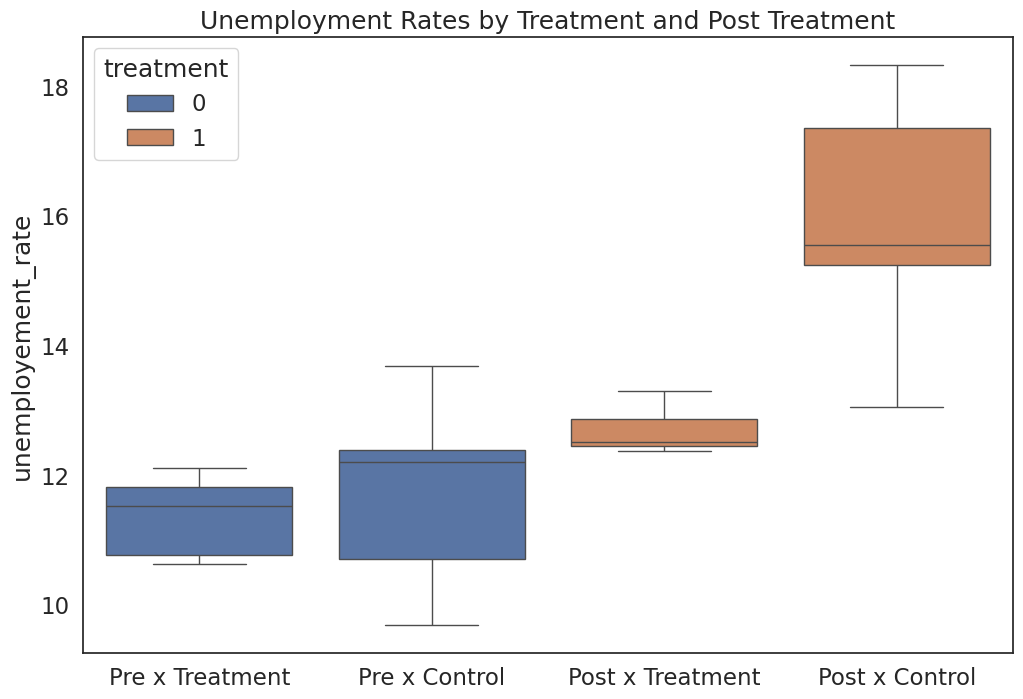

In [ ]:
did['category']=did['treatment'].astype(str)+did['post'].astype(str) # this variable is just for the plot below
sns.boxplot(x='category', y='unemployement_rate', hue='treatment', data=did).set_xticklabels(["Pre x Treatment", "Pre x Control",'Post x Treatment','Post x Control'])
plt.xlabel('')
plt.title('Unemployment Rates by Treatment and Post Treatment')
plt.show()

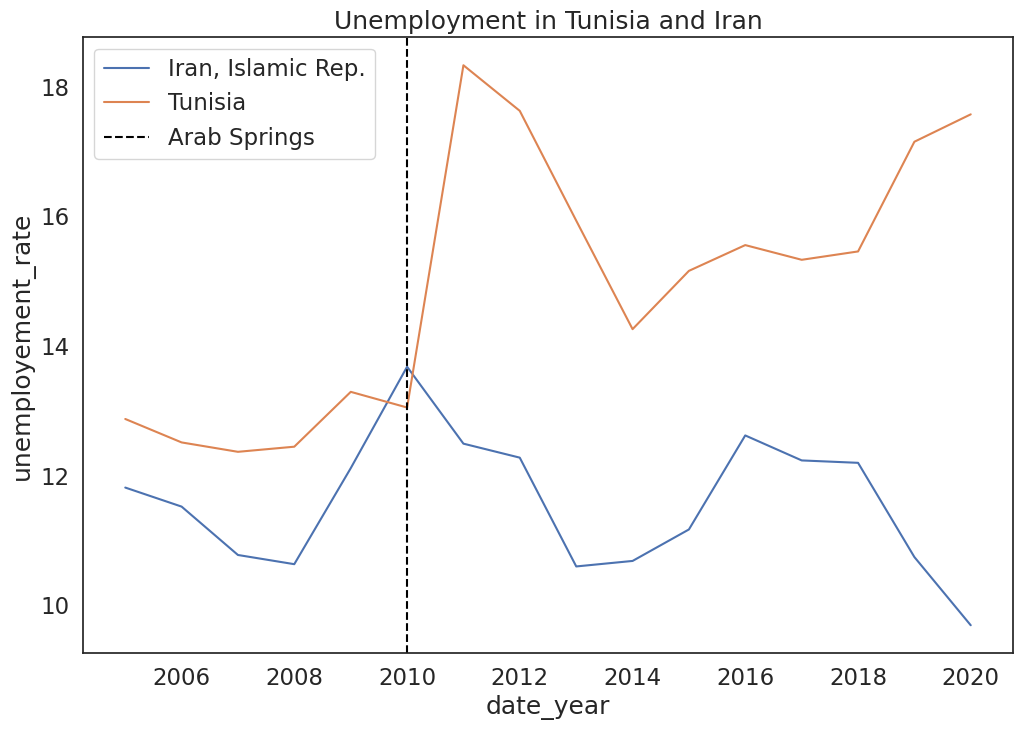

In [ ]:
did=did[(did['date_year']>='2005-01-01') & (did['date_year']<='2020-01-01')]
sns.lineplot(data=did,x='date_year',y='unemployement_rate',hue='Country_name')
plt.axvline(pd.to_datetime('2010-01-01'),color='black',linestyle='dashed', label='Arab Springs')
plt.title('Unemployment in Tunisia and Iran')
plt.legend()

In [ ]:
did_model = ols('unemployement_rate ~  post + treatment + post_treatment', did).fit()
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:     unemployement_rate   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     28.67
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.11e-08
Time:                        21:57:58   Log-Likelihood:                -49.488
No. Observations:                  32   AIC:                             107.0
Df Residuals:                      28   BIC:                             112.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.3694      0.543     20.

In [ ]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

X = did[['post', 'treatment', 'post_treatment']]
y = did['unemployement_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

did_model = smf.ols('unemployement_rate ~ post + treatment + post_treatment', data=pd.concat([X_train, y_train], axis=1)).fit()

print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:     unemployement_rate   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     19.78
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           3.37e-06
Time:                        22:04:41   Log-Likelihood:                -36.102
No. Observations:                  24   AIC:                             80.20
Df Residuals:                      20   BIC:                             84.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.3694      0.534     21.